Решение SimpleControlProblem последовательным алгоритмом A2C 

In [ ]:
import numpy as np
import torch.nn as nn
from Agents.Utilities.SequentialNetwork import SequentialNetwork
from Agents.A2C import A2C_Discrete
from Agents.Utilities.ContinuousAgentMakers.ContinuousAgentMaker import  ContinuousAgentMaker
from Environments.SimpleControlProblem.SimpleControlProblem import SimpleControlProblem
from Environments.SimpleControlProblem.SimpleControlProblemVisualizer import SimpleControlProblemVisualizer
import Solvers.OneAgentSolver as solver

env = SimpleControlProblem(dt=0.2)
action_values = np.array([env.action_min, env.action_min/2, [0], env.action_max/2, env.action_max])
action_n = len(action_values)

pi_model = SequentialNetwork([env.state_dim, 128, action_n], nn.ReLU())
v_model = SequentialNetwork([env.state_dim, 128, 1], nn.ReLU())
A2C = ContinuousAgentMaker(A2C_Discrete)
agent = A2C(pi_model, v_model, action_values=action_values,
             gamma=1, pi_model_lr=1e-3, v_model_lr=1e-3, entropy_threshold=0.01)

visualizer = SimpleControlProblemVisualizer(waiting_for_show=50)
solver.go(env, agent, episode_n=201, show=visualizer.show, session_len=2500, session_n=10)


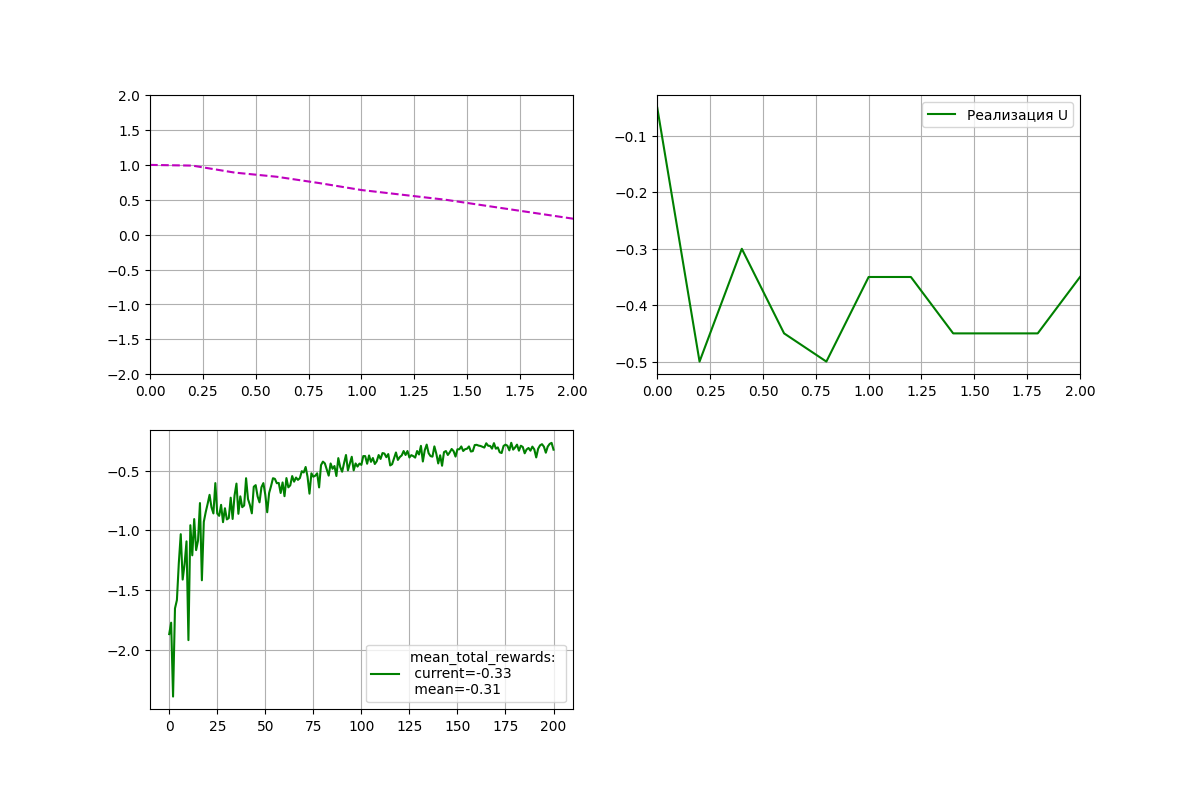